In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

In [3]:
df = pd.read_csv('FLO_L3_20170317.csv', skiprows=[1])
df = df[df['sw pCO2 (uatm)'] != -9999]
df = df[df['Lon'] > -70.155]

# With differenting alphas

In [4]:
import matplotlib.animation as animation
from matplotlib import colors

# sort by time order 
df = df.sort_values(['secDay'])

n = len(df)
speed = 2

vmin = df['sw pCO2 (uatm)'].min()
vmax = df['sw pCO2 (uatm)'].max()

In [5]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    
    if curr == int(n / speed):
        a.event_source.stop()
           
    curr *= speed
    
    plt.cla()
    plt.gca().set_title('In Water $pCO_2$ (uatm)')
    plt.gca().set_ylabel('Longitude')
    plt.gca().set_xlabel('Latitude')
    
    plt.gca().set_xlim(-70.155, -70.140)
    plt.gca().set_ylim(43.716, 43.730)
    
    trailing_pts = 10
    
    if curr <= trailing_pts:
        curr_prev = 0
    else:
        curr_prev = curr - trailing_pts
        
        
    # creates a color array
    data = df['sw pCO2 (uatm)']
    norm = colors.Normalize()
    norm.autoscale(data)
    rgba_colors = plt.cm.jet(norm(data.values))
    
    # varies alphas so only k points are shown with 
    rgba_colors[:, 3] = 0.1
    rgba_colors[curr_prev:curr, 3] = 1
    
    plt.scatter(x=df['Lon'][:curr], y=df['Lat'][:curr], 
                c=rgba_colors, s=20)

    plt.annotate('time: {}'.format(curr), [-70.143,43.728])
    plt.tight_layout()
#     plt.gcf().colorbar(ax=plt.gca())


<IPython.core.display.Javascript object>


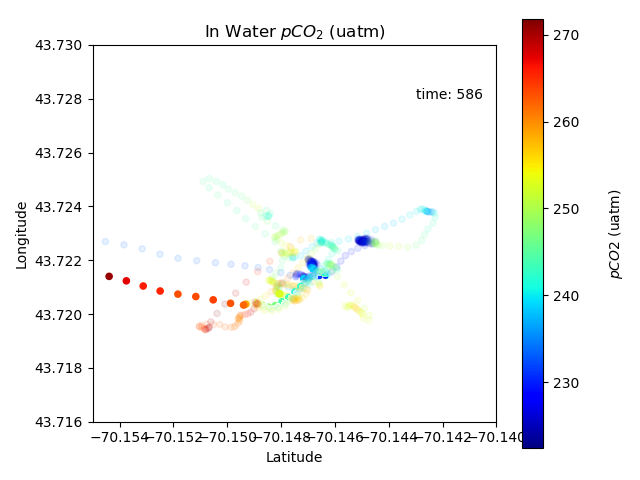

In [6]:
fig, ax = plt.subplots()

data = np.linspace(df['sw pCO2 (uatm)'].max(), df['sw pCO2 (uatm)'].max(), 100).reshape(10, 10)
im = ax.imshow(data, cmap='jet')
cbar = fig.colorbar(im)
cbar.set_label(r'$pCO2$ (uatm)', rotation=90, labelpad=20)
plt.cla()

plt.gca().set_title('In Water $pCO_2$ (uatm)')
plt.gca().set_ylabel('Longitude')
plt.gca().set_xlabel('Latitude')

ax.set_xlim(-70.155, -70.140)
ax.set_ylim(43.716, 43.730)
plt.tight_layout()

a = animation.FuncAnimation(fig, update, interval=100, frames=500, repeat=False)

In [35]:
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# a.save('boat_track.mp4', writer=writer)

# Only showing k coordinates at a time

In [7]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    
    if curr == int(n / speed):
        a.event_source.stop()
           
    curr *= speed
    
    plt.cla()
    plt.gca().set_title('In Water fCO2 (uatm)')
    plt.gca().set_ylabel('Longitude')
    plt.gca().set_xlabel('Latitude')
    
    plt.gca().set_xlim(-70.155, -70.140)
    plt.gca().set_ylim(43.716, 43.730)
    
    trailing_pts = 10
    
    if curr <= trailing_pts:
        curr_prev = 0
    else:
        curr_prev = curr - trailing_pts
        
    # only plot k points at a time with index slicing    
    plt.scatter(x=df['Lon'][curr_prev:curr], y=df['Lat'][curr_prev:curr], 
                c=df['sw fCO2 (uatm)'][curr_prev:curr], cmap=plt.cm.jet, s=20,
                norm=colors.Normalize(vmin=vmin, vmax=vmax))

    plt.annotate('time: {}'.format(curr), [-70.143,43.728])
    plt.tight_layout()
#     plt.gcf().colorbar(ax=plt.gca())


<IPython.core.display.Javascript object>


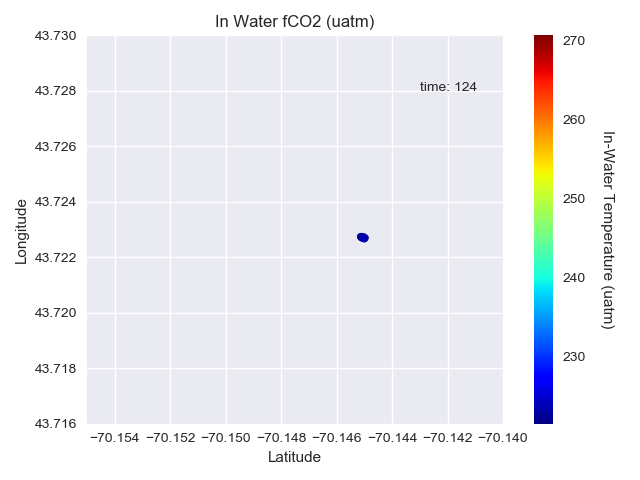

In [8]:
fig, ax = plt.subplots()

data = np.linspace(df['sw fCO2 (uatm)'].max(), df['sw fCO2 (uatm)'].max(), 100).reshape(10, 10)
im = ax.imshow(data, cmap='jet')
cbar = fig.colorbar(im)
cbar.set_label(r'In-Water Temperature (uatm)', rotation=270, labelpad=20)
plt.cla()

ax.set_xlim(-70.155, -70.140)
ax.set_ylim(43.716, 43.730)
plt.tight_layout()

a = animation.FuncAnimation(fig, update, interval=10)

<IPython.core.display.Javascript object>


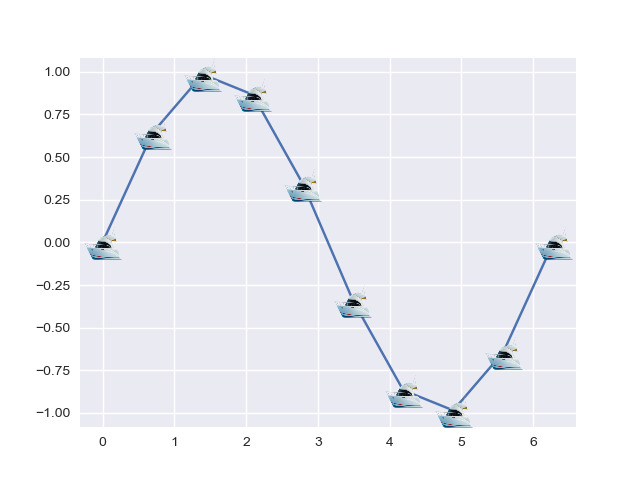

In [9]:
from os.path import join, dirname, abspath
from matplotlib import pyplot
from matplotlib.cbook import get_sample_data
from numpy import linspace
from numpy.core.umath import pi
from numpy.ma import sin

# poo-mark came from emojipedia:
# https://emojipedia-us.s3.amazonaws.com/thumbs/120/apple/96/pile-of-poo_1f4a9.png
poo_img = pyplot.imread(get_sample_data("/Users/Mike/Data Science/Independent Projects/Kelp Data Analysis and Visualization/motor-boat.png"))

x = linspace(0, 2*pi, num=10)
y = sin(x)

fig, ax = pyplot.subplots()
plot = ax.plot(x, y, linestyle="-")

ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
poo_size = ax_width/(fig_width*len(x))
poo_axs = [None for i in range(len(x))]
for i in range(len(x)):
    loc = ax.transData.transform((x[i], y[i]))
    poo_axs[i] = fig.add_axes([loc[0]/fig_width-poo_size/2, loc[1]/fig_height-poo_size/2,
                               poo_size, poo_size], anchor='C')
    poo_axs[i].imshow(poo_img)
    poo_axs[i].axis("off")

## Drawing over a map

In [109]:
from mpl_toolkits.basemap import Basemap

<IPython.core.display.Javascript object>


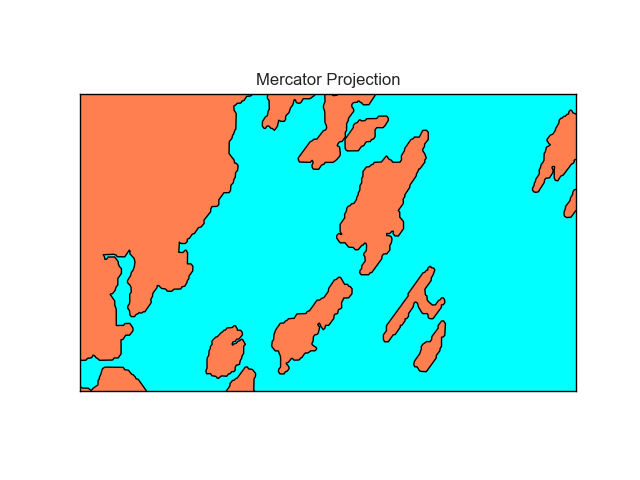

/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


In [172]:
lower_lat, upper_lat = (43, 43.730)
lower_lon, upper_lon = (-71, -70.140)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
plt.figure()
m = Basemap(projection='lcc', width=20000, height=12000, lon_0=-70.147, lat_0=43.721, resolution='f')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
plt.title("Overview of Maine")

<IPython.core.display.Javascript object>


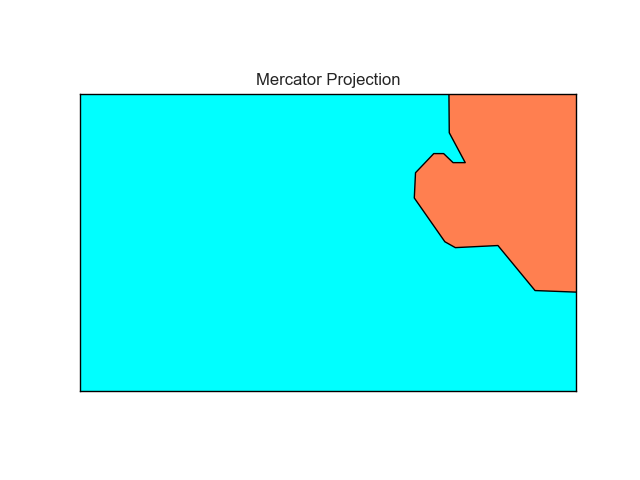

/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


In [173]:
lower_lat, upper_lat = (43, 43.730)
lower_lon, upper_lon = (-71, -70.140)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
plt.figure()
m = Basemap(projection='lcc', width=2000, height=1200, lon_0=-70.147, lat_0=43.721, resolution='f')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")

In [162]:
x,y = m(43.724735, -70.123703)
m.is_land(y,x)

False

<IPython.core.display.Javascript object>


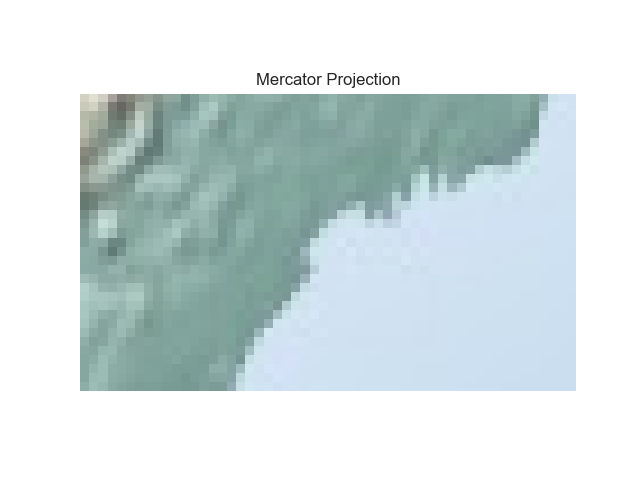

/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Mike/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [176]:
lower_lat, upper_lat = (43, 43.730)
lower_lon, upper_lon = (-71, -70.140)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
plt.figure()
m = Basemap(projection='lcc', width=200000, height=120000, lon_0=-70.147, lat_0=43.721, resolution='c')
m.shadedrelief()
# draw parallels and meridians.
plt.title("Mercator Projection")

In [182]:
df.columns

Index(['Julian Day', 'secDay', 'Lat', 'Lon', 'Heading', 'Speed (m/s)',
       'Water temp (C)', 'Cond (mmho/cm)', 'Salinity (PSU)', 'CDOM (ppb)',
       'Chl a (mg/m3)', 'Attenuation (c660)', 'O2 umol/L', '% sat O2',
       'Pressure (hPa)', 'sw xCO2 m (umol/mol)', 'sw xCO2 dry (umol/mol)',
       'sw pCO2 dry (uatm)', 'sw pCO2 (uatm)', 'sw fCO2 (uatm)',
       'air xCO2 (uatm)', 'air fCO2 (uatm)', 'air xCO2 (uatm).1',
       'air fCO2 (uatm).1', 'solar zenith (deg)', 'depth (m)',
       'Nitrate (umol/L)', 'Pressure (hPa).1', 'Phyco (ppb)', 'pH',
       'O2 umol/L.1', '% sat O2.1', 'air temp', 'PAR'],
      dtype='object')